<a href="https://colab.research.google.com/github/parklaus1078/realLifeMLProjects/blob/main/%EC%9D%98%EB%A5%98_%ED%8C%90%EB%A7%A4%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 의류 판매량 예측

- 데이터 전처리 및 EDA
- 시계열 데이터 모델링
- Random Forest 모델링

### 시나리오

A 의류 회사에서는 생산량을 조절하기 위해서 판매량을 예측하려 한다. 의류의 종류에 따라 계절성을 많이 타기 때문에, 이러한 특성을 고려할 수 있는 모델링이 필요하다. 데이터를 살펴보며 의류 판매량 예측을 진행한다.

In [3]:
import warnings
warnings.filterwarnings("ignore")   # Eliminating Warnings

from google.colab import drive
drive.mount("/content/drive")        # Mounting Google Drive

import os
os.chdir("/content/drive/MyDrive/MLNotes/Part 4. 머신러닝 실전 프로젝트/Chapter 01. 의류 판매량 예측 모델/Data")       # Routing
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/MLNotes/Part 4. 머신러닝 실전 프로젝트/Chapter 01. 의류 판매량 예측 모델/Data'

In [4]:
%pip install mxnet gluonts #--quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [5]:
import pandas as pd
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

df = pd.read_excel("WEAR_TS_ALL.xlsx")
df.head()

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.shape

(515, 1463)

## Data Spec Check

- **Project Objective** : Predicting Sales Qunatity of clothes
- **Data Processing Objective** : Experiencing how the real life data needs to be processed
- **Data Processing Aims** :
    1. Feature Manipulation - data manipulation to reenact data preprocessing
    #2. **(Deprecated)**Data Augmentation - generating additional data to reflect Time Series data analysis and Big volume characteristics
    3. Data Split - splitting data to refer to many different tables at a time
- **Data Processing Contents**:
    1. Feature Manipulation
        - Transpose
        - Acquiring information from the data by statistically analyzing the data
    #2. Data Augmentation
    3. Data Split
        - Splittzing the data set into Train subset(95%) and Test subset(5%) to evaluate
- **Data Processing Results** :
    - As is
        - Row : 515
        - Column : 1463
        - table : 1
    - To be(1)
        - Row : 1461(*+946*)
        - Column : 1(*-1462*)
        - table : 1
    - To be(2)
        - Row : 1308(*-153*)
        - Column : 15(*+14*)
        - table : 1



## Problem Solving Process

- Definition of Problem :
    - The quantity of remaining stocks are increasing.
    - If the sales qunatity can be estimated, the inventory cost can be controlled startegically.

- Expected Effects :
    - Estimating the future sales quantity can help estimating adequate number of goods to be produced, which may help managing cost efficiently

- Solutions :
    - Estimating the future sales quantity using Time Series Estimation.
    - Estimating the future sales quantity using RandomForest

- Order of Problem solving :
    1. Data Preprocessing
    2. Data Visualization
    3. Time Series Estimation
        - Times Series Data model using DeepAR
        - Time Series modeling Error Result
    4. Modelling RandomForest Regression model
        - Make a dataset for RandomForestRegressor
        - Split Data into Train/Test
        - Tune by hand to decrease underfitting
        - Add more feature to consider additional characteristics

- Evaluation of Performance :
    - Difference between the actual and estimated sales quantity

- How will this project help me?
    - With this project, I learn how to solve problems when the data is in Time Series Format.




## 1. Data Preprocessing and EDA(Exploratory Data Analysis)
- Grasping the Basic characteristics of the collected data \
    a. Check Data Shape \
    b. Check Data Type \
    c. Check Null Values \


In [7]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import pandas as pd
from matplotlib import rc
from matplotlib.dates import date2num

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
# !apt -qq -y install fonts-nanum
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# rc("font", family='NanumBarunGothic')
# fm._rebuild()

%pip install koreanize-matplotlib
plt.rcParams["axes.unicode_minus"] = False

mx.random.seed(0)
np.random.seed(0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.8 MB/s eta 0:00:00


In [8]:
ts_df = pd.read_excel("WEAR_TS_ALL.xlsx")
ts_df.head()

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Columns: 1463 entries, SEASON to 2019-12-31 00:00:00
dtypes: float64(1461), object(2)
memory usage: 5.7+ MB


In [10]:
# a. Check Data Shape
print("df :", ts_df.shape)

df : (515, 1463)


In [11]:
# b. Check Data Type
print("df data types :\n\n{}".format(ts_df.dtypes))

df data types :

SEASON                  object
TYPE                    object
2016-01-01 00:00:00    float64
2016-01-02 00:00:00    float64
2016-01-03 00:00:00    float64
                        ...   
2019-12-27 00:00:00    float64
2019-12-28 00:00:00    float64
2019-12-29 00:00:00    float64
2019-12-30 00:00:00    float64
2019-12-31 00:00:00    float64
Length: 1463, dtype: object


In [12]:
# c. Check Null Values
# Domestic data and Oversea data have different features, so two of them cannot be modelled at a time.
# Hence, the domestic data should be filtered first
ts_df_domestic = ts_df[ts_df["TYPE"] == "국내"]      # Conditional Indexing domestic data

In [13]:
# Aim is to estimate the seasonal sales quantity. Hence group the data by SEASON
ts_df_domestic_seasonal = ts_df_domestic.groupby("SEASON").sum()

In [14]:
# Transpose the data to handle in rows
ts_df_domestic_seasonal = ts_df_domestic_seasonal.T
ts_df_domestic_seasonal.head()

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2016-01-02 00:00:00,0.0,0.0,0.0,0.0,0.0
2016-01-03 00:00:00,0.0,0.0,0.0,0.0,0.0
2016-01-04 00:00:00,0.0,0.0,0.0,0.0,0.0
2016-01-05 00:00:00,2.0,0.0,0.0,0.0,0.0


In [15]:
# Transform the index into datetime type index
ts_df_domestic_seasonal.index = pd.to_datetime(ts_df_domestic_seasonal.index)
ts_df_domestic_seasonal.head()

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0


In [16]:
# Concatenate the data frame's columns
df = pd.concat([
    ts_df_domestic_seasonal[ts_df_domestic_seasonal.index.year==2016]["16SS"],
    ts_df_domestic_seasonal[ts_df_domestic_seasonal.index.year==2017]["17SS"],
    ts_df_domestic_seasonal[ts_df_domestic_seasonal.index.year==2018]["18SS"],
    ts_df_domestic_seasonal[ts_df_domestic_seasonal.index.year==2019]["19SS"],
])

df = pd.DataFrame(df, columns=["sales"])
df

,sales
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,2.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,0.0
2019-12-30,0.0


## 2. Data Visualization


<Axes: >

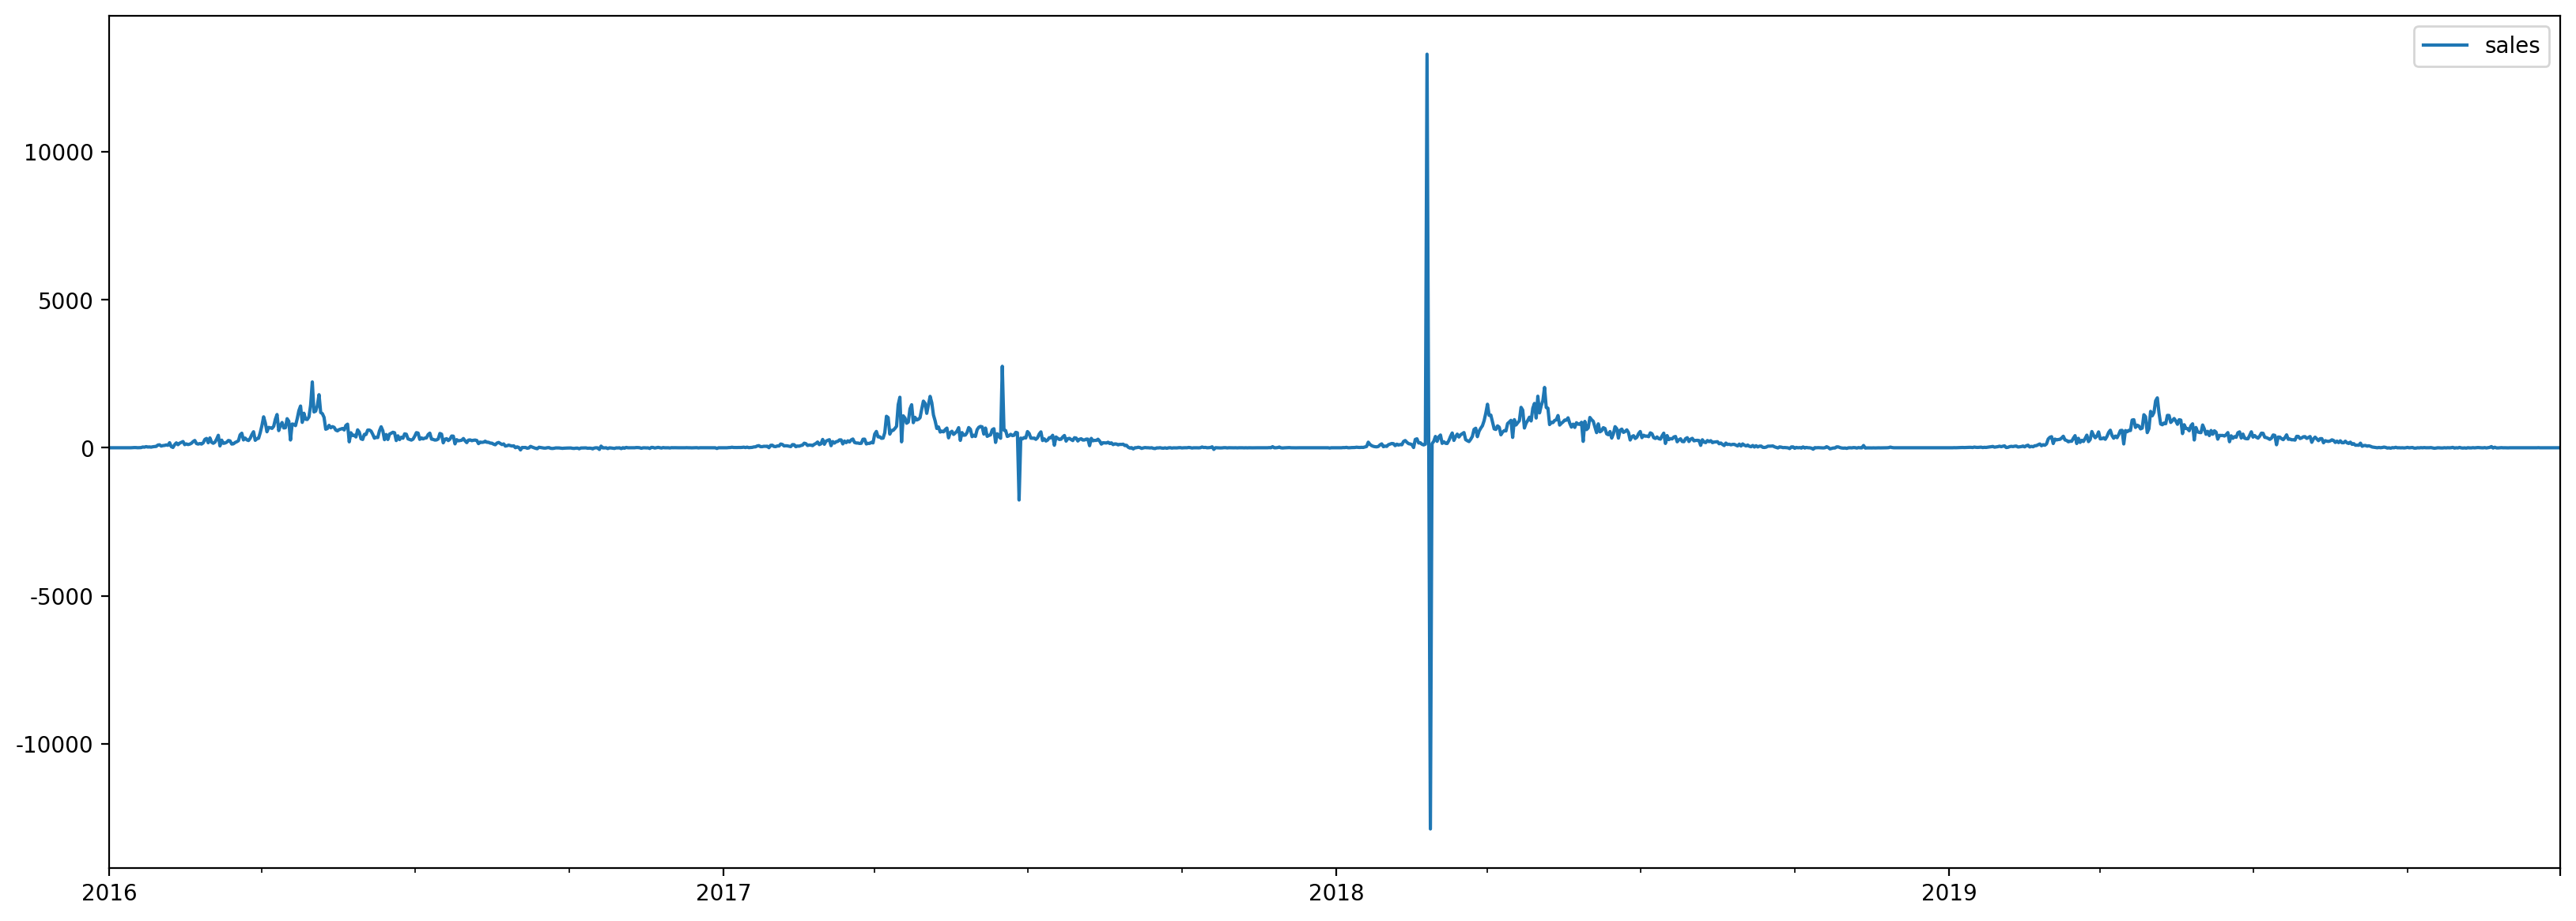

In [17]:
df.plot(figsize=(20,7))
# There is a spike of up and down in the first quarter of 2018SS,
# which was caused by the Chinese merchandises who tried to secure the stock by
# ordering high quantity at a time and request refund. Be careful not to conclude
# hastily when this kind of outlier is detected. Always consult with the clients
# about the anomaly before making Machine Learning models.

In [18]:
# Remove the Outliers that are not valid at all
df[(df["sales"] < -1000) | (df["sales"] > 2500)] = 0

<Axes: >

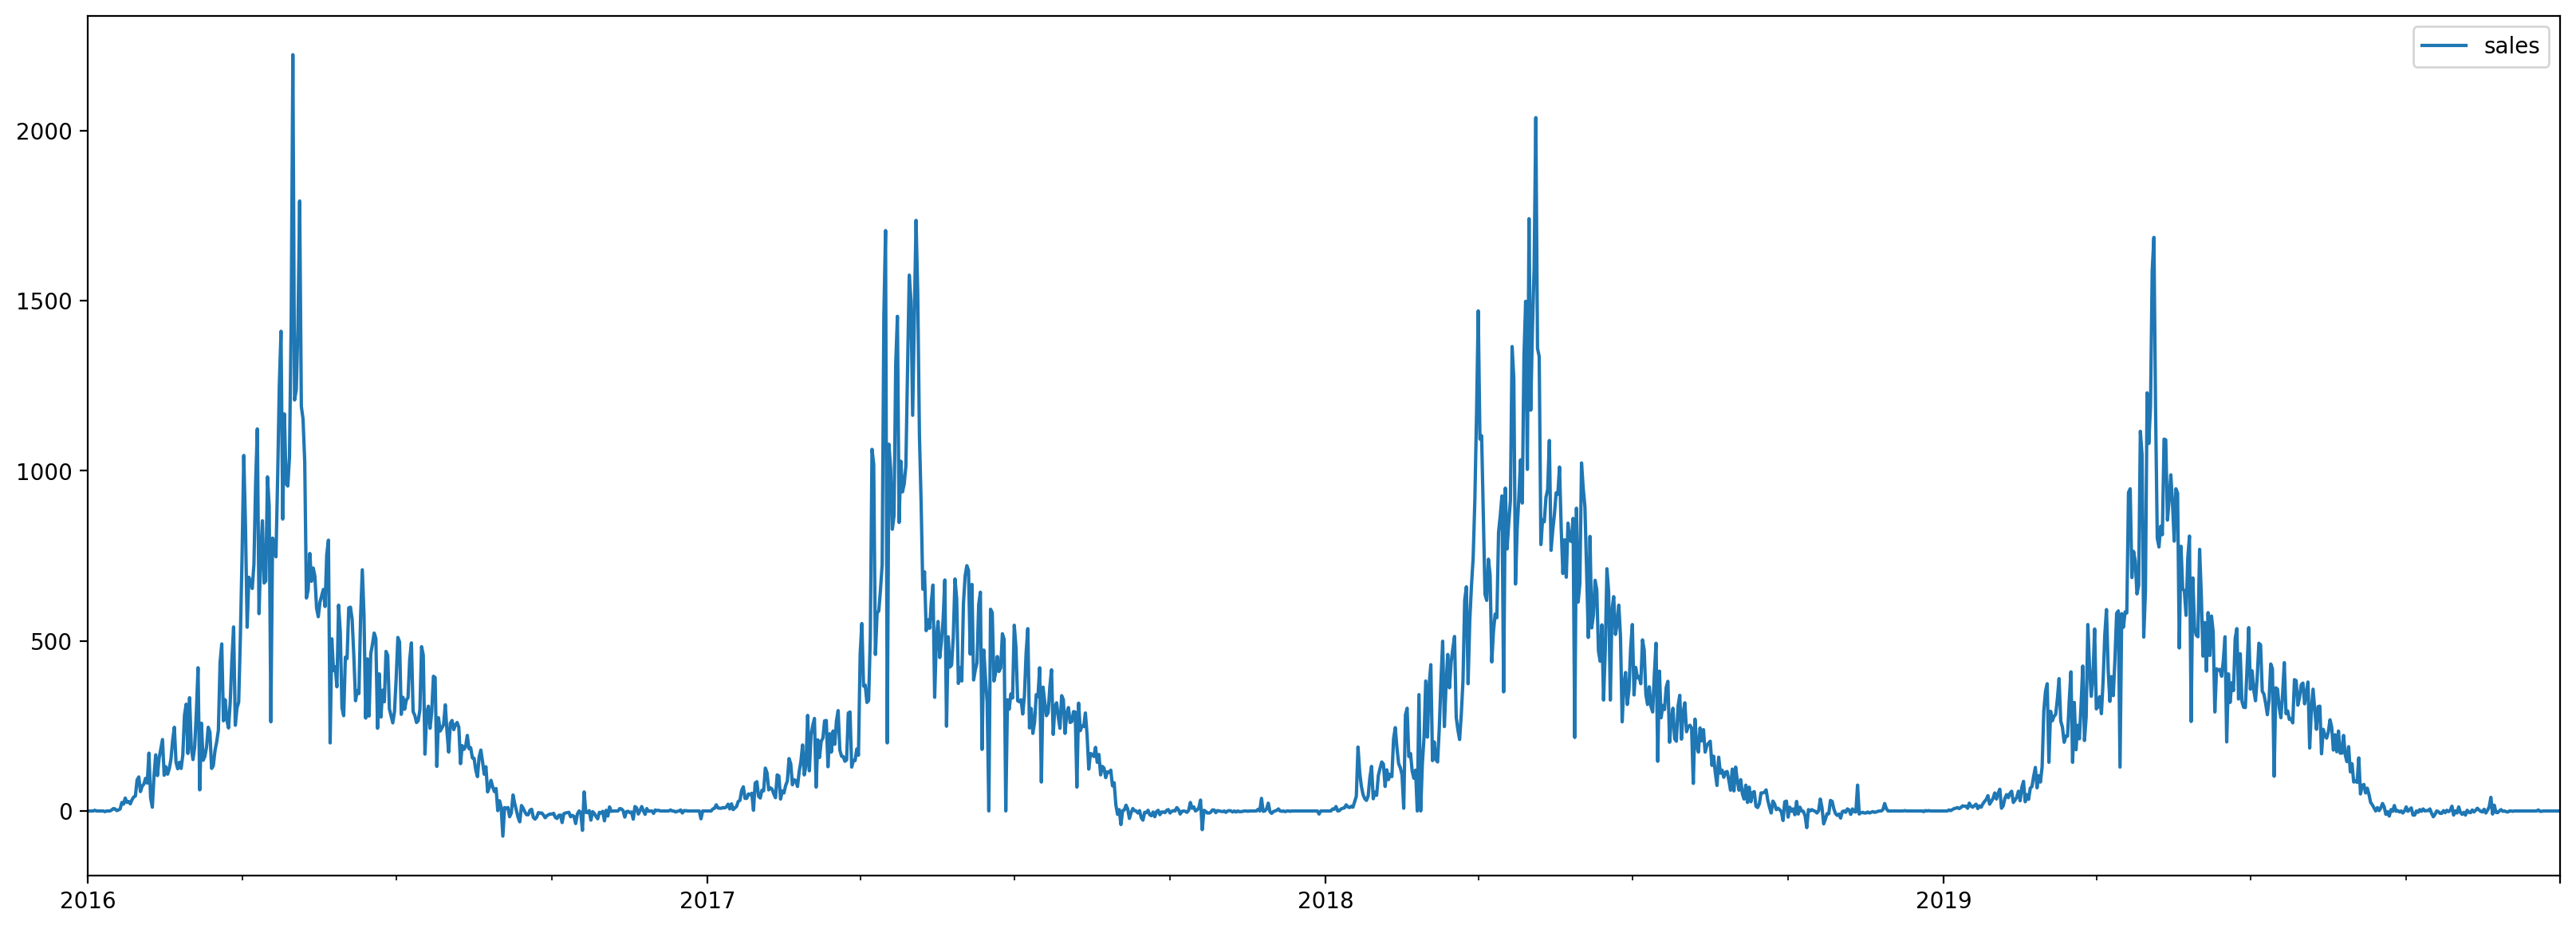

In [19]:
df.plot(figsize=(20, 7))
# Observable insight :
# It seems like there is a seasonality on the sales. This product tends to be sold
# highly during SS season(spring & summer).
# Also, There are the points, where the sales drop suddenly. According to the client,
# this phenomenan is because of the events that the client opened and closed.

In [20]:
# Train subset is from 2016SS to right before 2019SS
train_df = df[:-200]
# Test subset is from 2019SS to right before 2019FW(AW) Peak(Around 100 days)
test_df = df[-200:-100]

<Axes: >

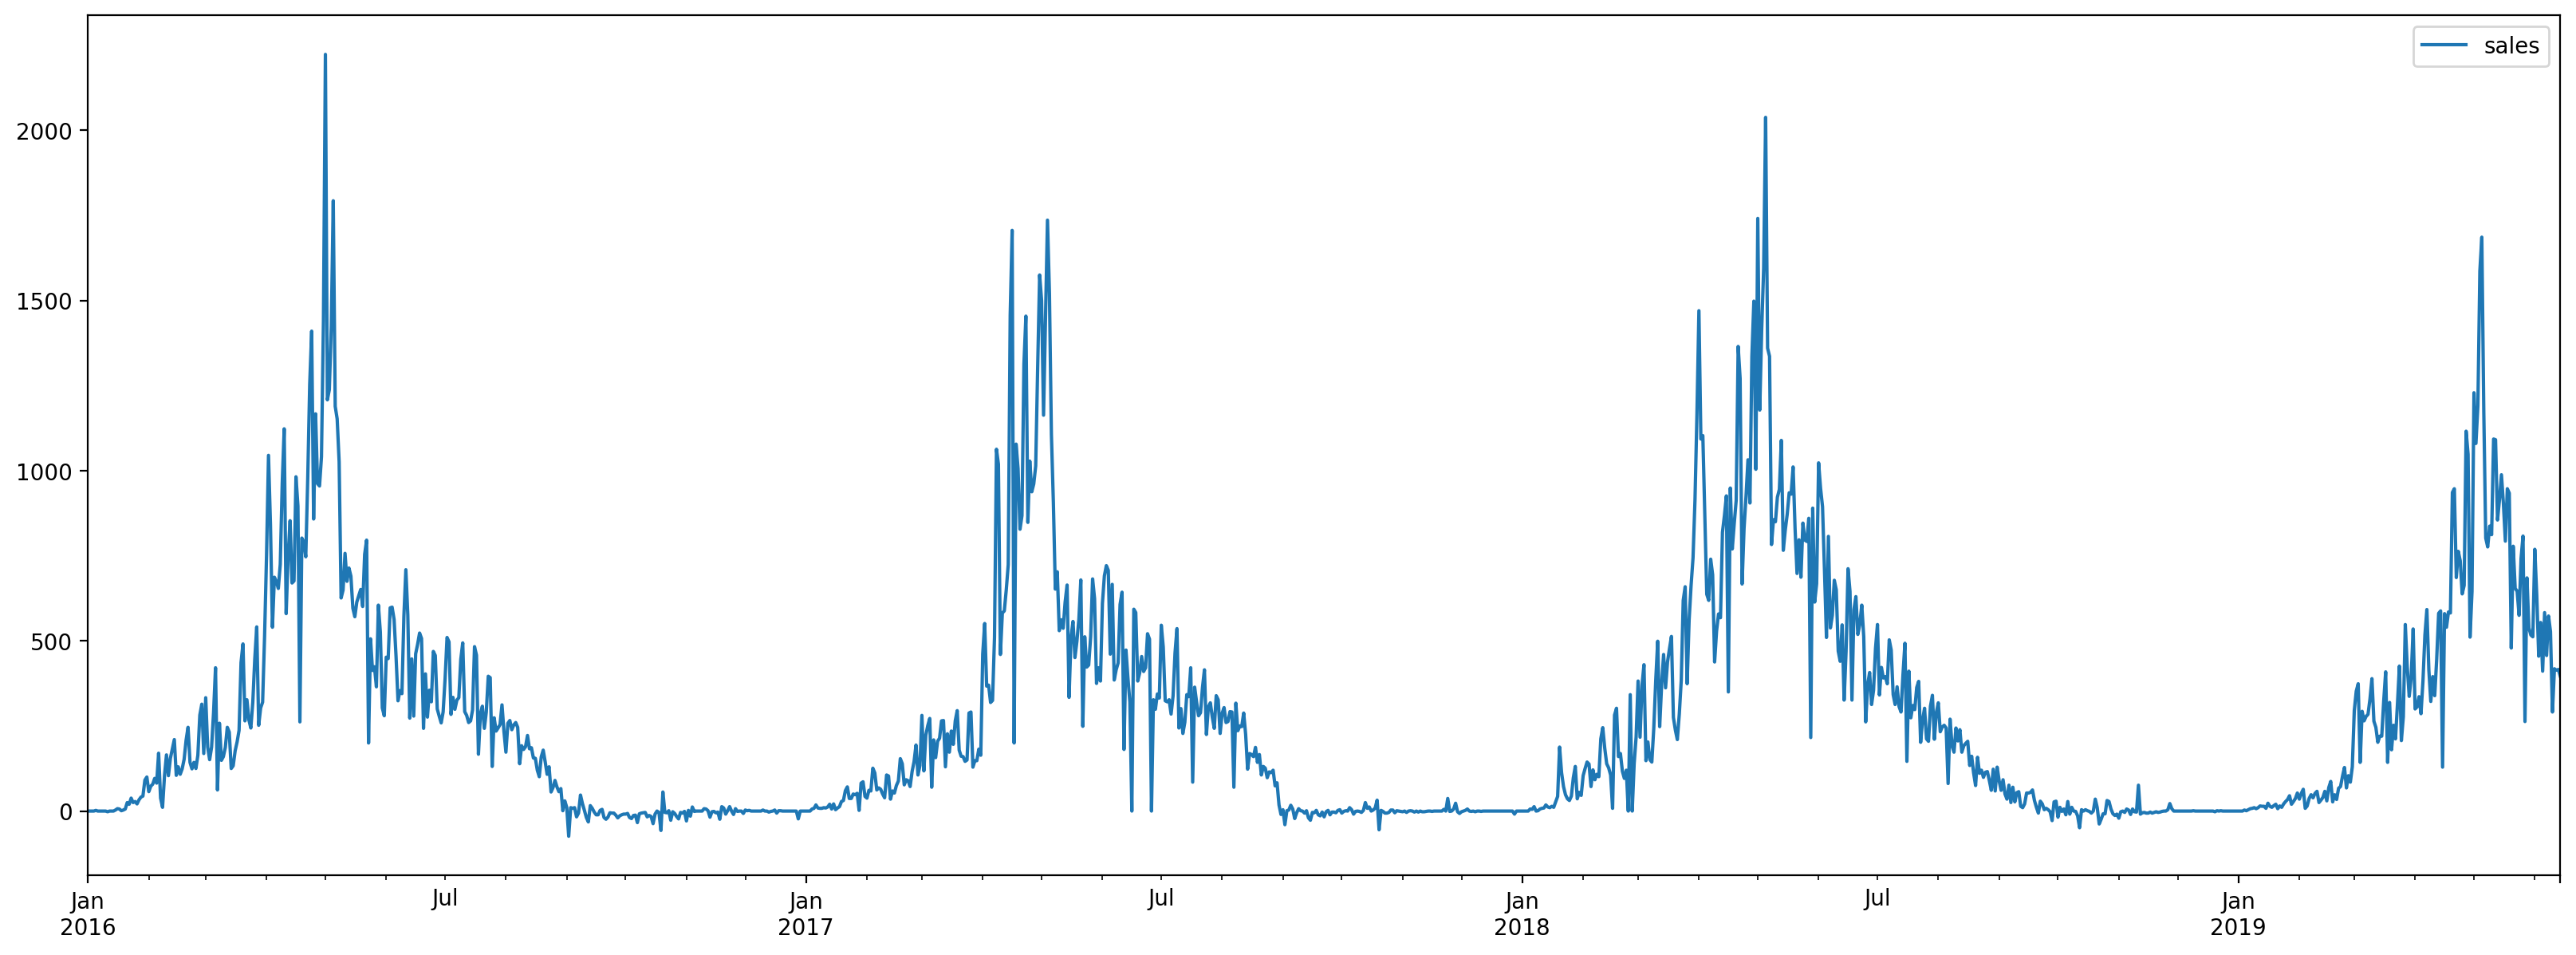

In [21]:
train_df.plot(figsize=(20, 7))

<Axes: >

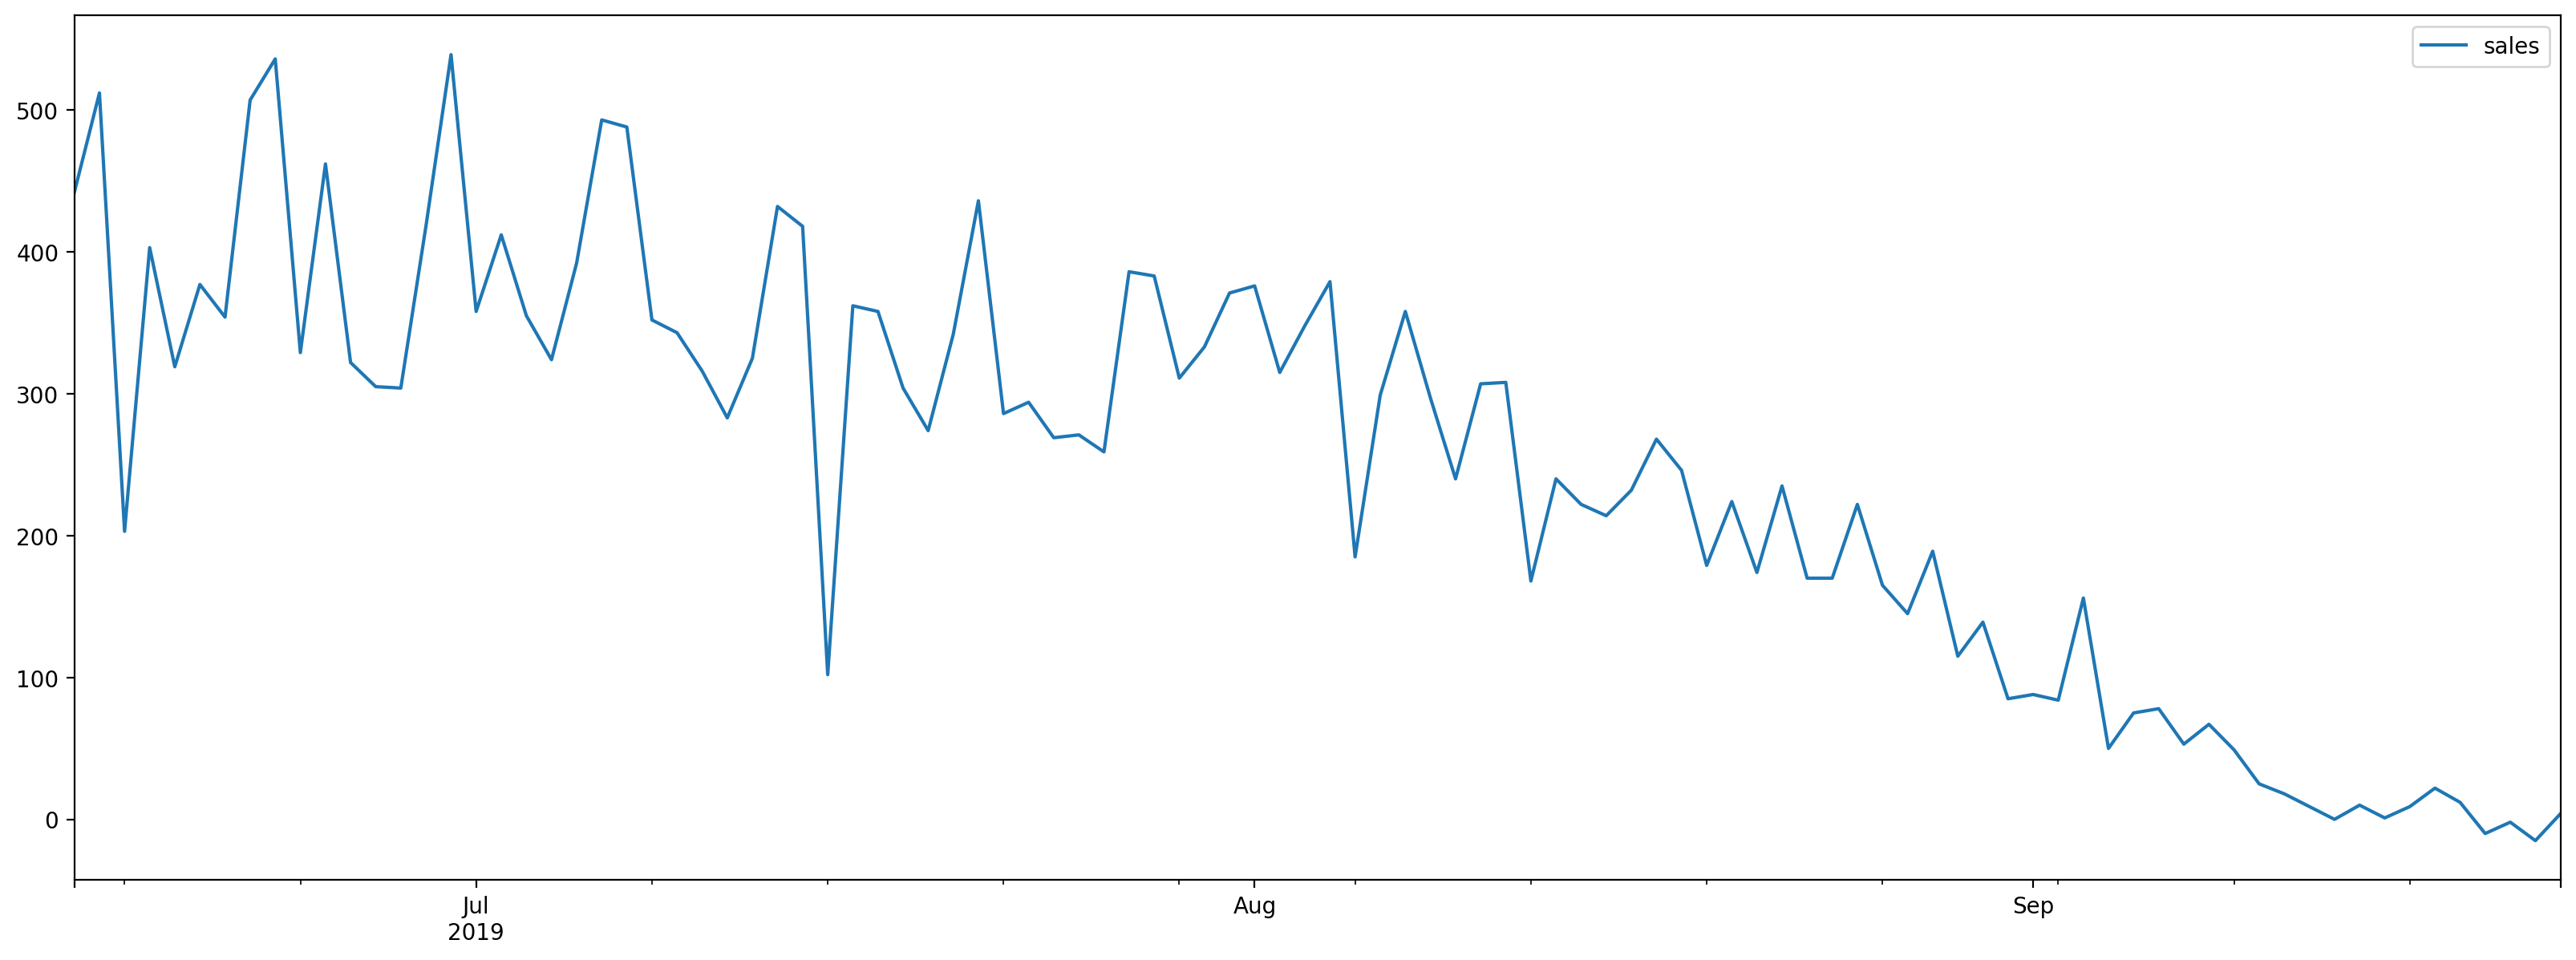

In [22]:
test_df.plot(figsize=(20, 7))

## 3. Time Series Data model using DeepAR

In [23]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from pathlib import Path

In [34]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    prediction_intervals = (0.5, 0.9)
    legend = ["Sales", "observations"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(20, 7))

    ts_entry.plot(ax=ax)
    forecast_entry.plot(intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [25]:
train_df.head(1)

,sales
2016-01-01,0.0


In [26]:
test_df.head(1)

,sales
2019-06-15,442.0


In [27]:
train_df.values.flatten()

array([  0.,   0.,   0., ..., 414., 416., 396.])

In [28]:
# To use DeepAR Algorithms, generate a ListDataset using pre-made DataFrame
train_ds = ListDataset([{FieldName.TARGET: train_df.values.flatten(),
                        FieldName.START: pd.Timestamp("2016-01-01 00:00:00", freq="D")}],           # D stands for Day
                        freq="D")
test_ds = ListDataset([{FieldName.TARGET: test_df.values.flatten(),
                       FieldName.START: pd.Timestamp("2019-06-15 00:00:00", freq="D")}],
                       freq="D")

In [29]:
test_ds

[{'target': array([442., 512., 203., 403., 319., 377., 354., 507., 536., 329., 462.,
         322., 305., 304., 418., 539., 358., 412., 355., 324., 392., 493.,
         488., 352., 343., 316., 283., 325., 432., 418., 102., 362., 358.,
         304., 274., 342., 436., 286., 294., 269., 271., 259., 386., 383.,
         311., 333., 371., 376., 315., 348., 379., 185., 299., 358., 297.,
         240., 307., 308., 168., 240., 222., 214., 232., 268., 246., 179.,
         224., 174., 235., 170., 170., 222., 165., 145., 189., 115., 139.,
          85.,  88.,  84., 156.,  50.,  75.,  78.,  53.,  67.,  49.,  25.,
          18.,   9.,   0.,  10.,   1.,   9.,  22.,  12., -10.,  -2., -15.,
           4.], dtype=float32),
  'start': Period('2019-06-15', 'D')}]

In [30]:
# Applying DeepAR(AutoRegression)
estimator = DeepAREstimator(
    freq="D",           # Data Frequency(Day, Week, Month, Year)
    trainer=Trainer(ctx="cpu", epochs=30, learning_rate=1E-3, hybridize=True, num_batches_per_epoch=30),            # Trainer : cpu | gpu, number of repeating training, num_batches_per_epoch(데이터 반복 주기)
    num_layers=4,        # number of Deeplearning layer(2< : Deeplearning)
    num_cells=40,        # number of lstm
    context_length=30,   # 상황을 인지하는 영역
    cell_type="lstm",    # gru
    prediction_length=30 # 얼마의 기간에 대해서 예측할 것인가
)

predictor = estimator.train(train_ds)

100%|██████████| 30/30 [00:05<00:00,  5.26it/s, epoch=30/30, avg_epoch_loss=4.23]


In [31]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,        # test_dataset
    predictor=predictor,    # predictor
    num_samples=10,         # Number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

In [32]:
forecasts[0]

gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[286.23032 , 286.25235 , 176.04137 , 170.35376 , 157.91017 ,
        199.87785 , 175.57913 , 258.8772  , 276.8843  , 208.39049 ,
        227.74658 , 214.07436 , 215.63521 , 210.1887  , 181.50954 ,
        249.74435 ,  47.386063, 101.833855,  56.791424, 119.70999 ,
        146.35703 , 214.30008 , 189.70271 , 100.24996 ,  63.403973,
         63.63299 ,  97.67213 ,  99.73388 , 141.7143  , 125.24006 ],
       [260.6687  , 287.45493 , 184.77881 , 122.62391 , 164.3682  ,
        158.59991 , 136.90662 ,  69.59267 , 232.68326 , 130.27765 ,
        169.03189 , 134.67816 , 172.74815 , 127.16423 , 181.88113 ,
        183.63834 ,  89.590935, 136.22356 ,  92.49177 , 108.61756 ,
         80.996315, 112.485855, 141.29578 ,  53.597626, 119.4593  ,
         51.018013,  58.087593,  56.523502,  49.672752, 101.24464 ],
       [279.99423 , 281.23557 , 201.15556 , 177.69536 ,  53.727364,
        118.29842 , 179.59727 , 196.14182 ,

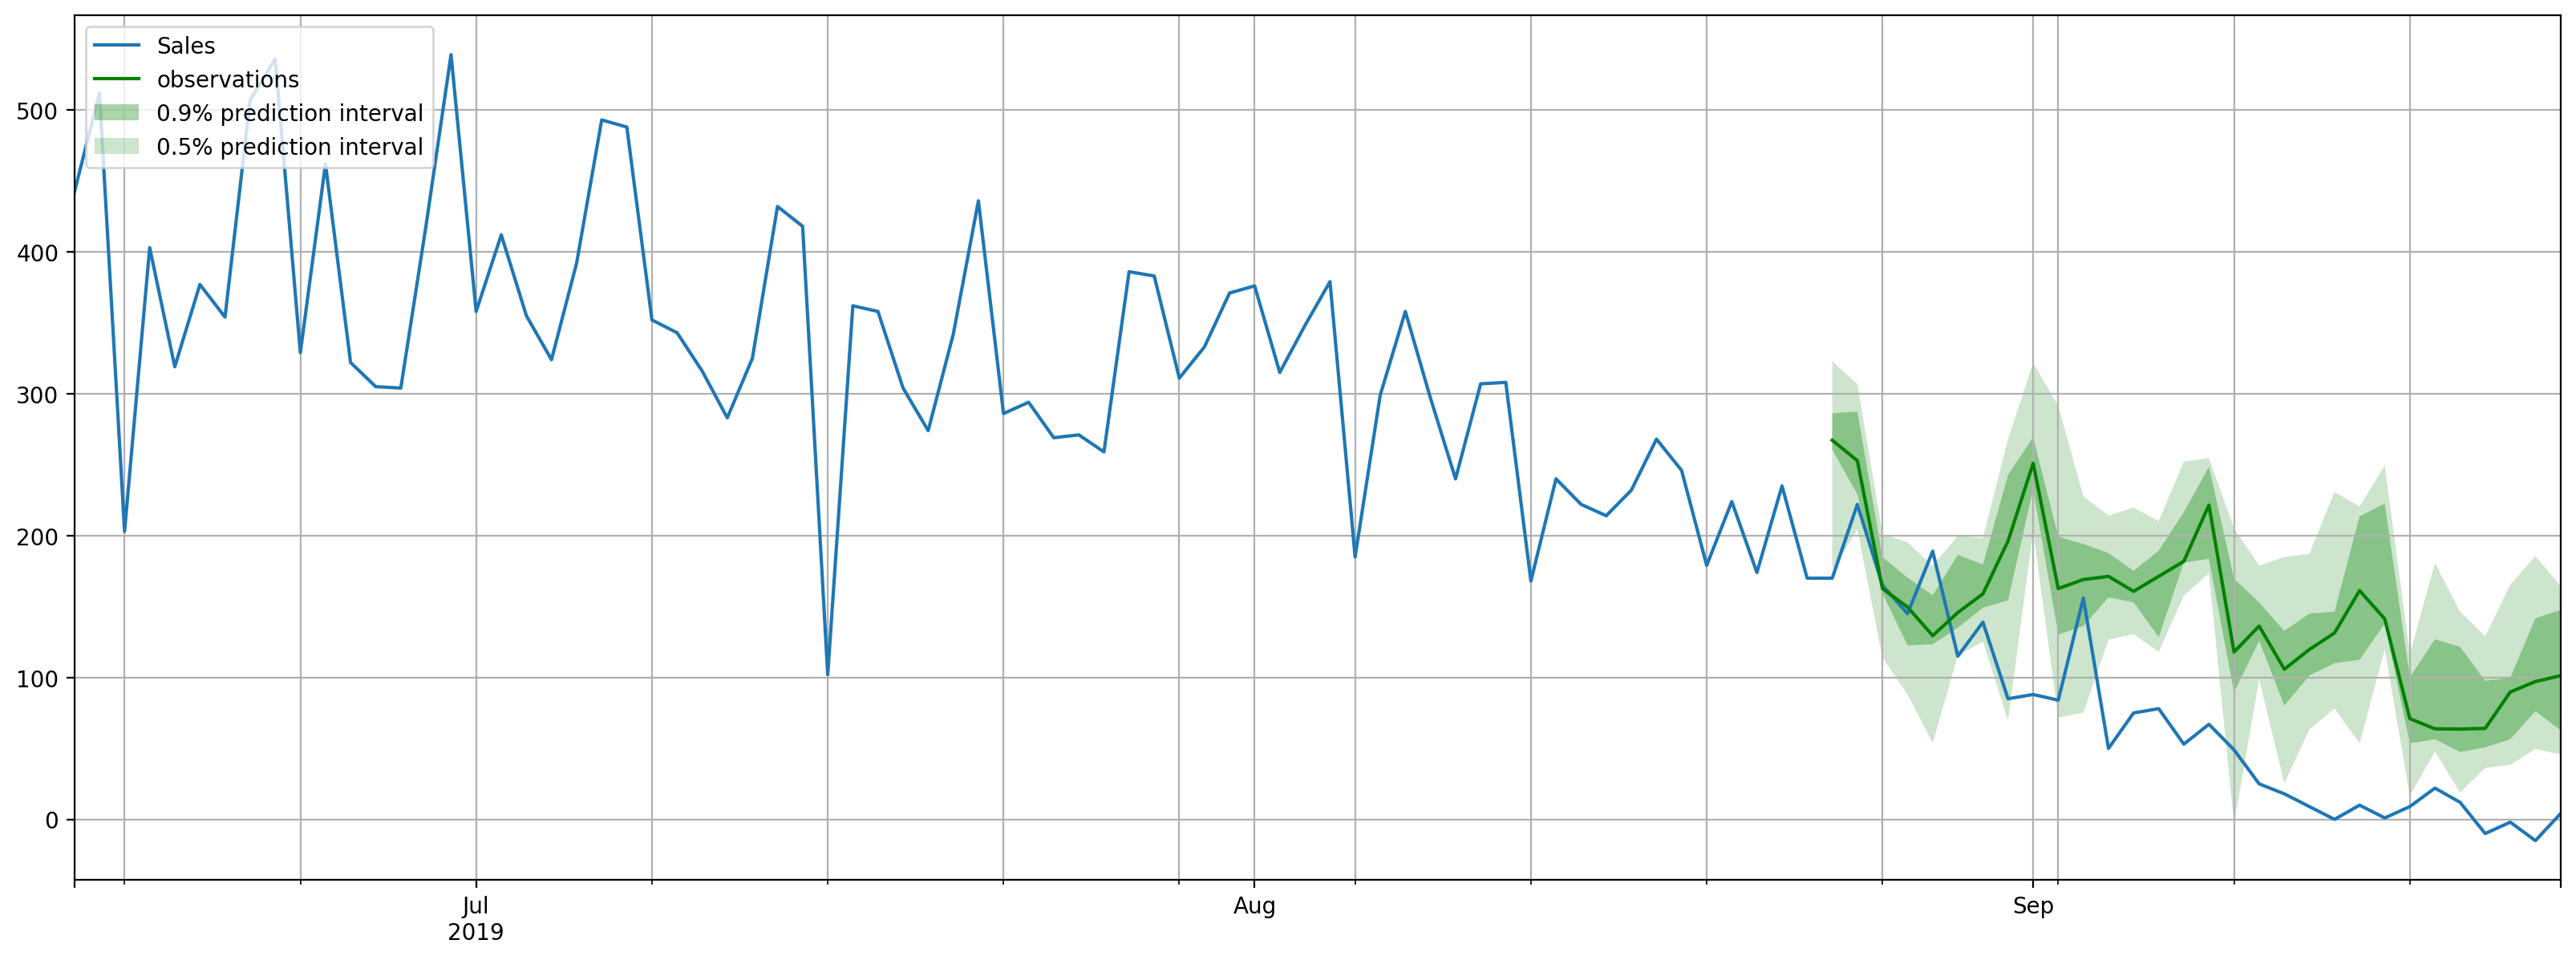

In [35]:
ts_entry = tss[0]
test_ds_entry = next(iter(test_ds))
forecast_entry = forecasts[0]

plot_prob_forecasts(ts_entry, forecast_entry)

## Time series modeling Error Result

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mean_squared_error(list(forecast_entry.quantile(.5)), list(ts_entry[0][-30:]), squared=False)   # ts_entry

95.3842725480231

In [37]:
mean_absolute_percentage_error(list(forecast_entry.quantile(.5)), list(ts_entry[0][-30:]))  #일일 예측량 중 실패한 비율: 0.63%

0.6338766310162751

## RandomForest Modeling

### Make a dataset for RandomForestRegressor

In [43]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def get_slope(arr):
    y = np.array(arr)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    return mape


In [48]:
rdf = df
rdf

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21
2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,0.0,-0.002597,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,3.0
2019-12-28,0.0,0.0,-0.003896,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,3.0
2019-12-29,0.0,0.0,-0.005195,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,3.0
2019-12-30,0.0,0.0,-0.006494,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,3.0


In [49]:
# 단변량 -> 다변량 데이터
rdf["slope7"] = rdf["sales"].rolling(7).apply(get_slope, raw=True)      # sales 데이터를 7개씩 묶어서 get_slope를 적용하는 것(7일 추세선)
rdf["slope21"] = rdf["sales"].rolling(21).apply(get_slope, raw=True)    # sales 데이터를 21개씩 묶어서 get_slope를 적용하는 것(21일 추세선)

rdf["std7"] = rdf["sales"].rolling(7).std(raw=True)                     # 7일간의 standard deviation
rdf["std21"] = rdf["sales"].rolling(21).std(raw=True)                   # 21일 간의 standard deviation

rdf["mean7"] = rdf["sales"].rolling(7).mean(raw=True)                   # 7일간의 sales 평균값
rdf["mean21"] = rdf["sales"].rolling(21).mean(raw=True)                 # 21일간의 sales 평균값

rdf["skew7"] = rdf["sales"].rolling(7).skew()                           # 7일간의 외도(치우침) - *외도는 기울기와 일맥상통함
rdf["skew21"] = rdf["sales"].rolling(21).skew()                         # 21일간의 외도(치우침)

rdf["kurt7"] = rdf["sales"].rolling(7).kurt()                           # 7일간의 첨도(얼마나 많이 쏠렸는가)
rdf["kurt21"] = rdf["sales"].rolling(21).kurt()                         # 21일간의 첨도(얼마나 많이 쏠렸는가)

rdf["min7"] = rdf["sales"].rolling(7).min()                             # 7일 중 최저 판매량
rdf["min21"] = rdf["sales"].rolling(21).min()                           # 21일 중 최저 판매량

rdf["min7"] = rdf["sales"].rolling(7).max()                             # 7일 중 최대 판매량
rdf["min21"] = rdf["sales"].rolling(21).max()                           # 21일 중 최대 판매량

display(rdf) #7일 기준, 21일 기준이기 때문에 초기 데이터에 대한 정보는 안 나오는 게 정상.

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21
2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,0.0,-0.002597,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,3.0
2019-12-28,0.0,0.0,-0.003896,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,3.0
2019-12-29,0.0,0.0,-0.005195,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,3.0
2019-12-30,0.0,0.0,-0.006494,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,3.0


In [50]:
rdf = rdf[31:-122]

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21
2016-02-01,57.0,10.428571,3.935065,29.668807,28.585461,55.285714,26.142857,0.707934,1.414898,-0.996791,1.687694,100.0,100.0
2016-02-02,73.0,7.428571,4.170130,25.927555,29.665597,62.714286,29.619048,0.432936,1.131092,-1.569140,0.591354,100.0,100.0
2016-02-03,79.0,4.928571,4.388312,22.779481,30.712337,69.285714,33.380952,-0.009294,0.890337,-1.599134,-0.201782,100.0,100.0
2016-02-04,96.0,3.750000,4.724675,20.796062,32.582934,77.142857,37.952381,-0.605401,0.728907,-0.889447,-0.711343,100.0,100.0
2016-02-05,82.0,-0.464286,4.797403,14.797040,32.904624,82.571429,41.714286,-0.671901,0.525719,0.109354,-1.088270,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,145.0,-6.250000,-6.789610,32.690468,56.287316,183.000000,227.809524,0.895658,0.599335,-0.546034,-0.107521,235.0,358.0
2019-08-28,189.0,-6.892857,-5.433766,32.493223,48.250290,185.142857,219.761905,0.641046,0.395539,-0.840631,-0.665575,235.0,308.0
2019-08-29,115.0,-7.285714,-5.690909,33.446475,49.996905,168.000000,211.095238,0.035360,0.224170,0.890255,-0.180060,222.0,308.0
2019-08-30,139.0,-10.107143,-6.214286,35.146632,51.899078,163.571429,206.285714,0.431834,0.350925,0.142680,-0.307589,222.0,308.0


## Split data into train/test

In [54]:
y = rdf["sales"]
X = rdf.drop("sales", axis=1).fillna(0)
X = X[:-30]
y = y[30:]

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=.03, random_state=0, shuffle=False)

MAPE(Mean Absolute Percentage Error): 58.690315425602876


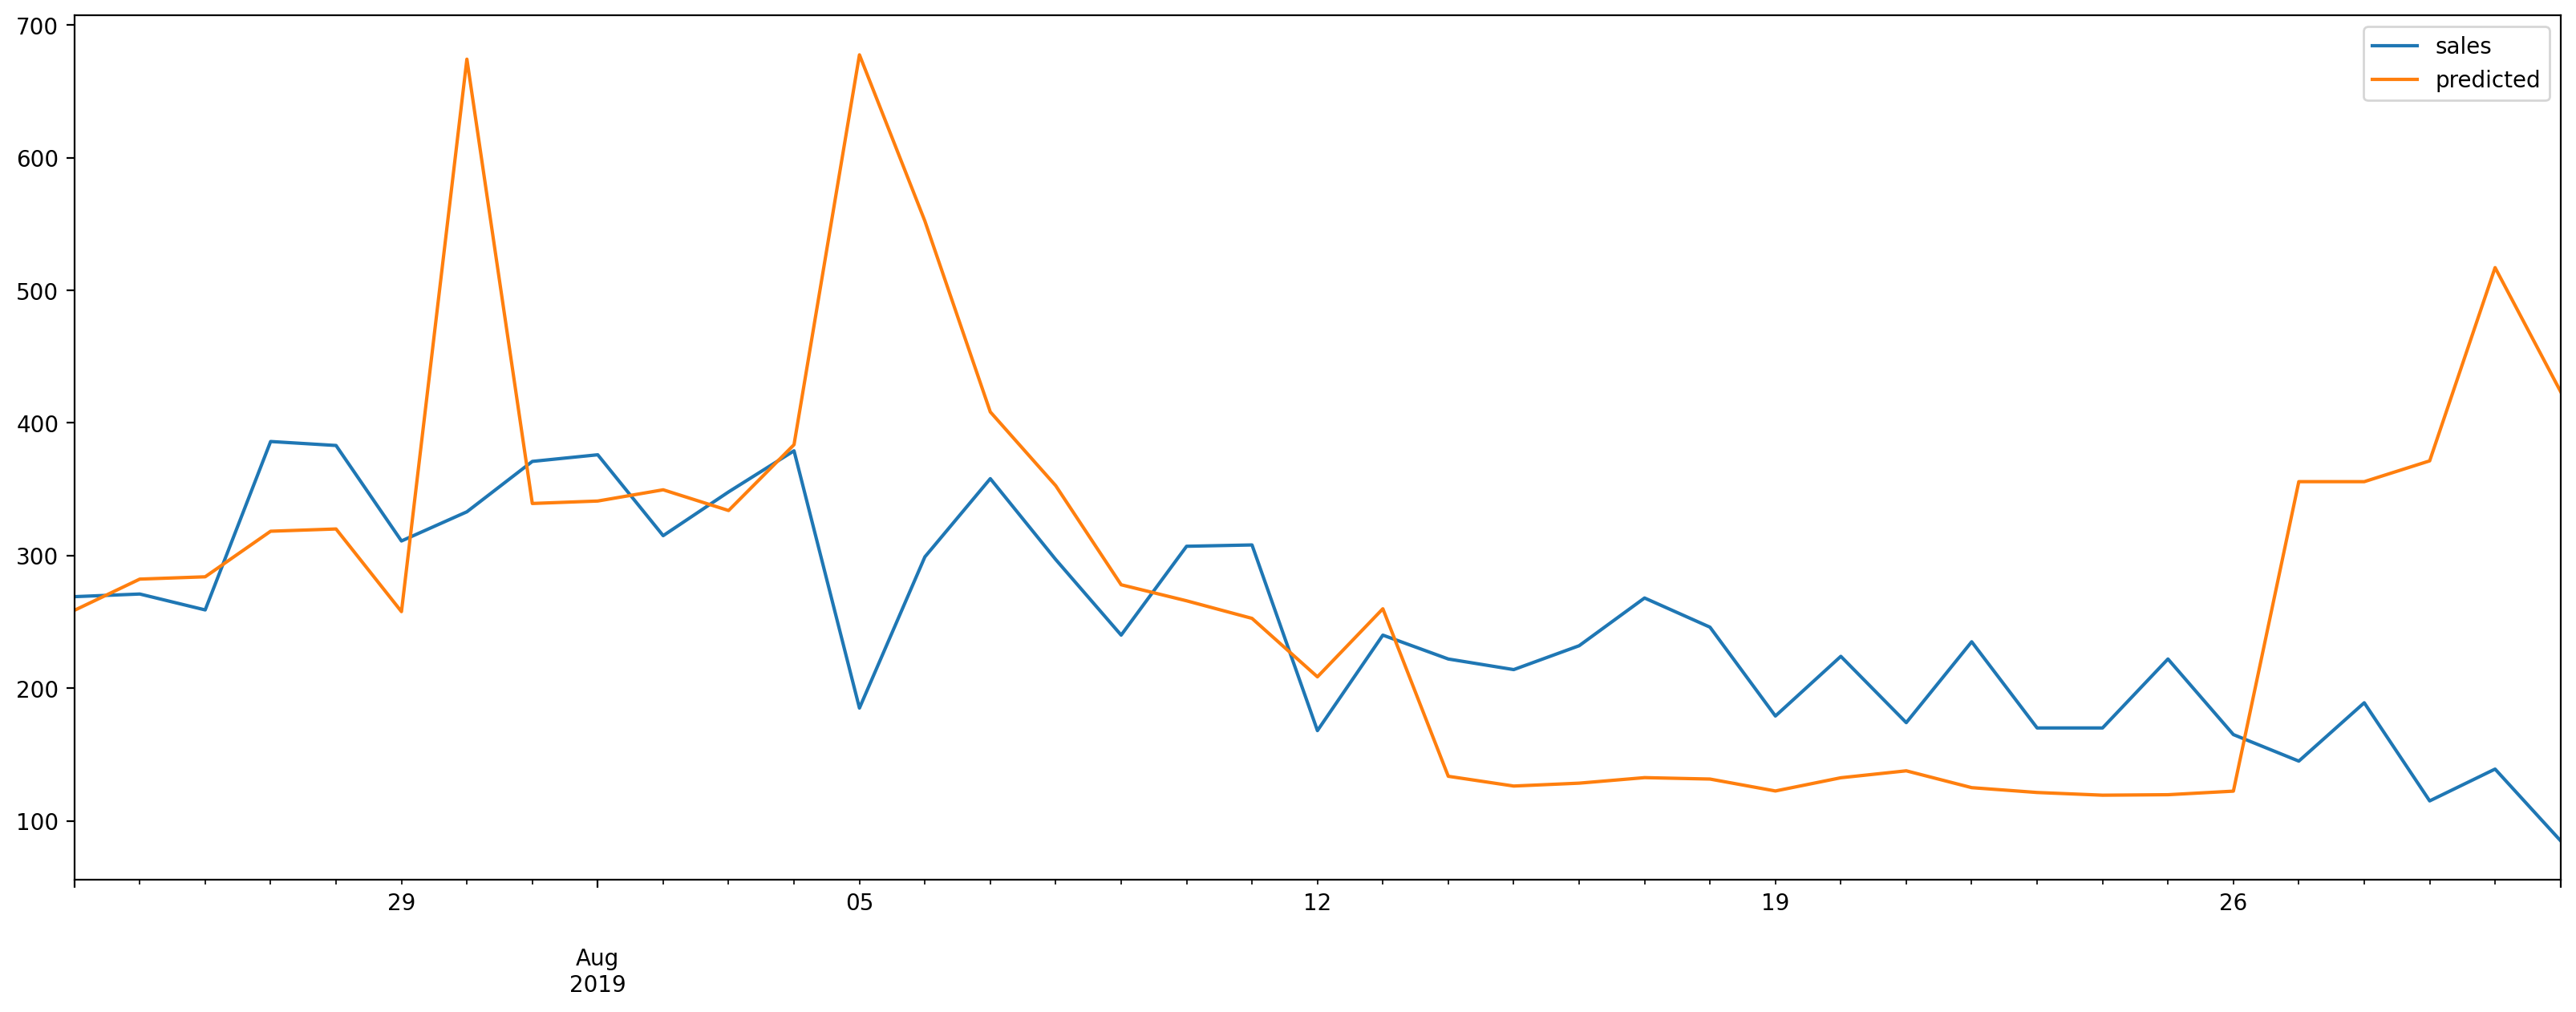

In [55]:
# RandomForest Training with default setting
rf = RandomForestRegressor(random_state=0)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf["predicted"] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE(Mean Absolute Percentage Error): {mape}")

## Tune by hand to decrease underfitting


MAPE: 31.873305317104446


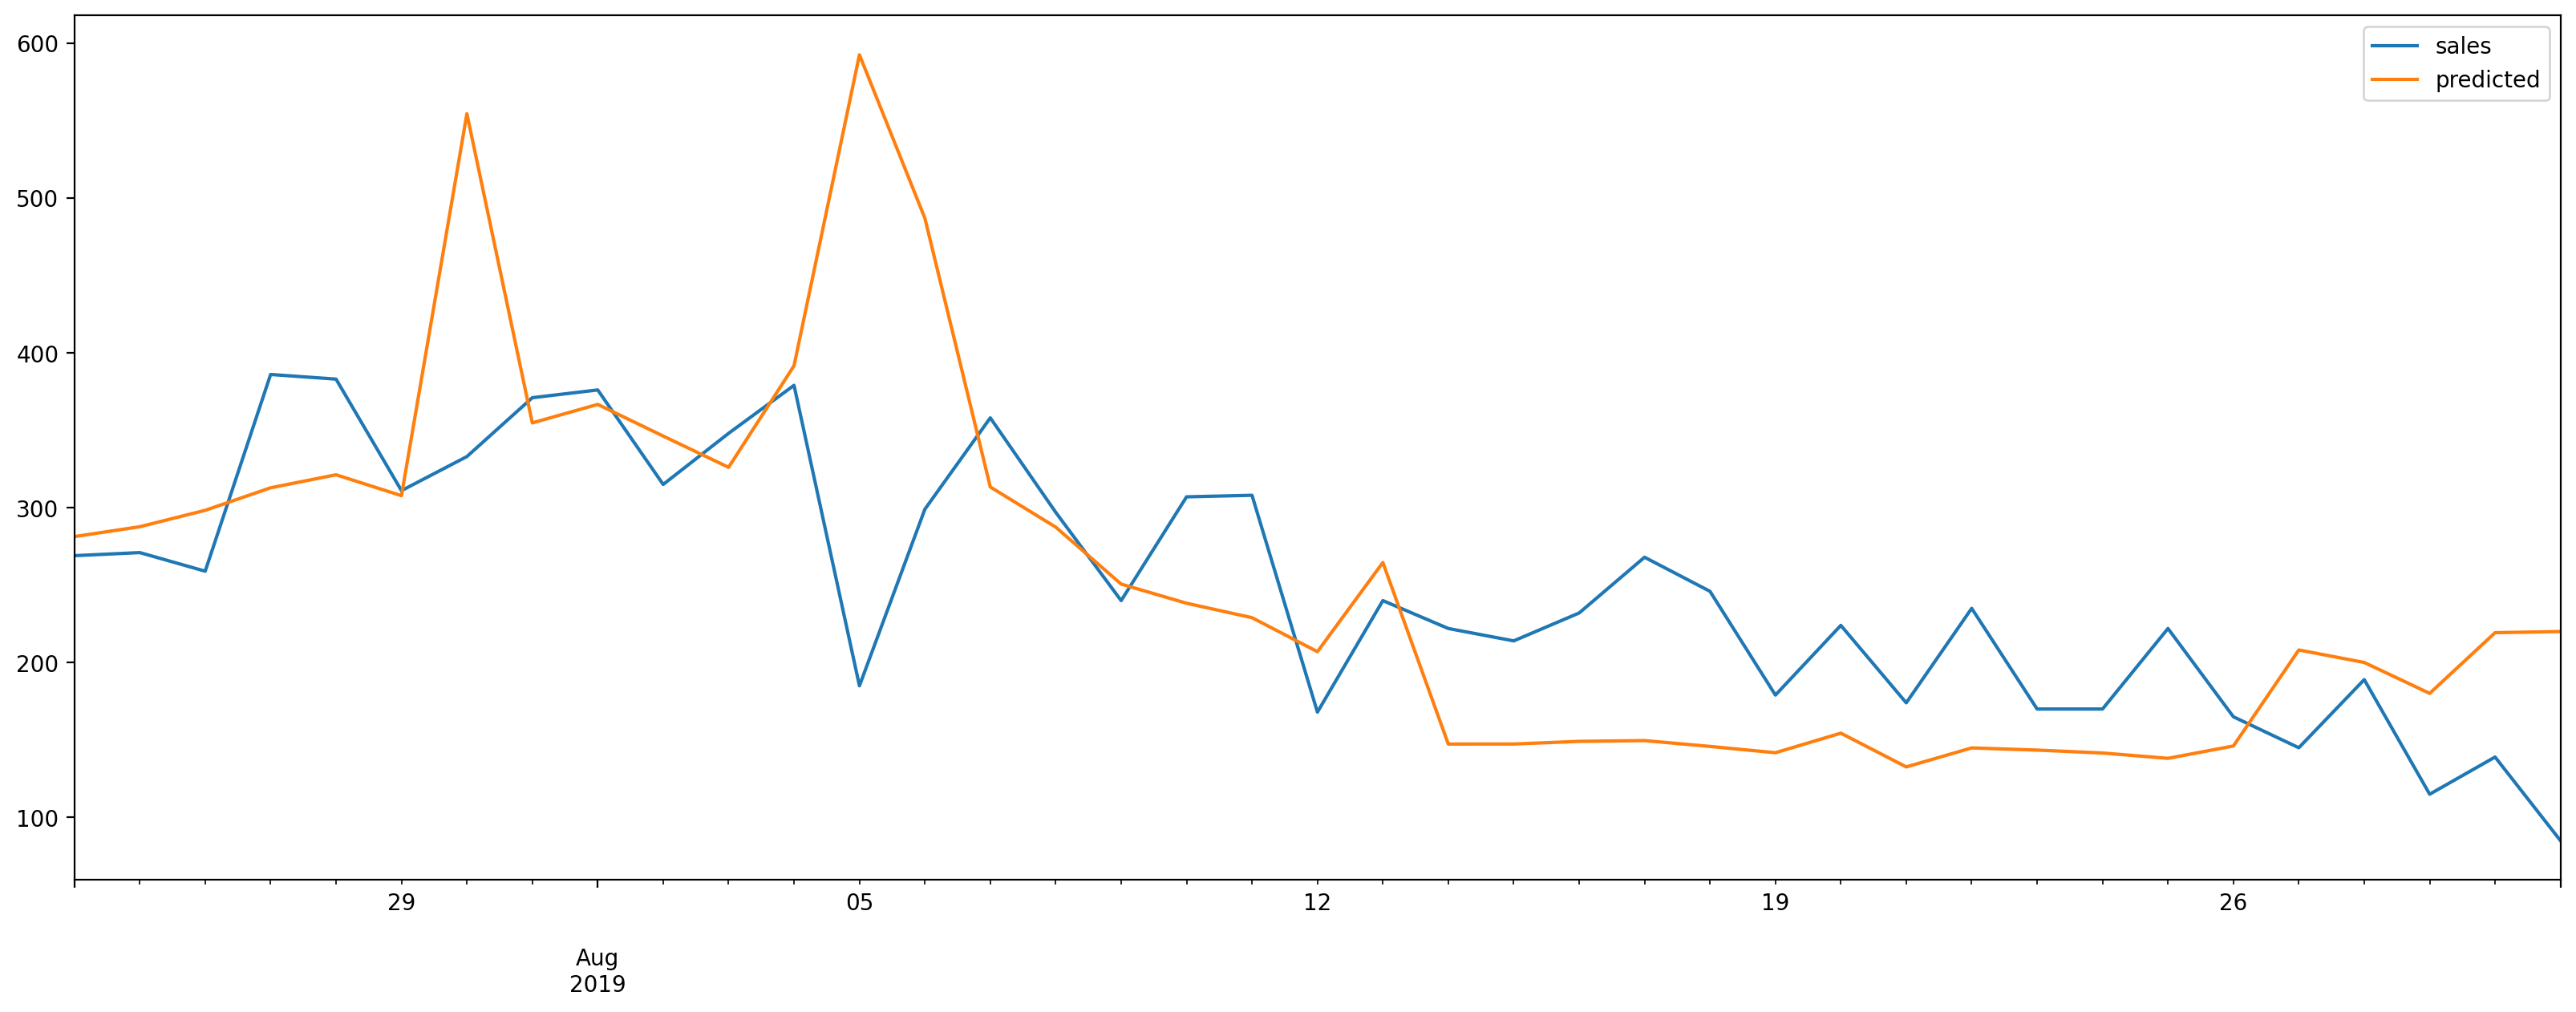

In [57]:
# ^^^Regarding the spikes, the model is underfitted
# Underfitting을 조정하기 위한 n_estimator와 max_features를 조정
rf = RandomForestRegressor(random_state=0, n_estimators=200, max_features=4)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf["predicted"] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

## Add More feature to consider additional characteristics

In [58]:
rdf["year"] = rdf.index.year
rdf["month"] = rdf.index.month
rdf["dayofweek"] = rdf.index.dayofweek

y = rdf["sales"]
X = rdf.drop("sales", axis=1).fillna(0)
X = X[:-30]
y = y[30:]

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=.03, random_state=0, shuffle=False)

MAPE: 23.28146157762206


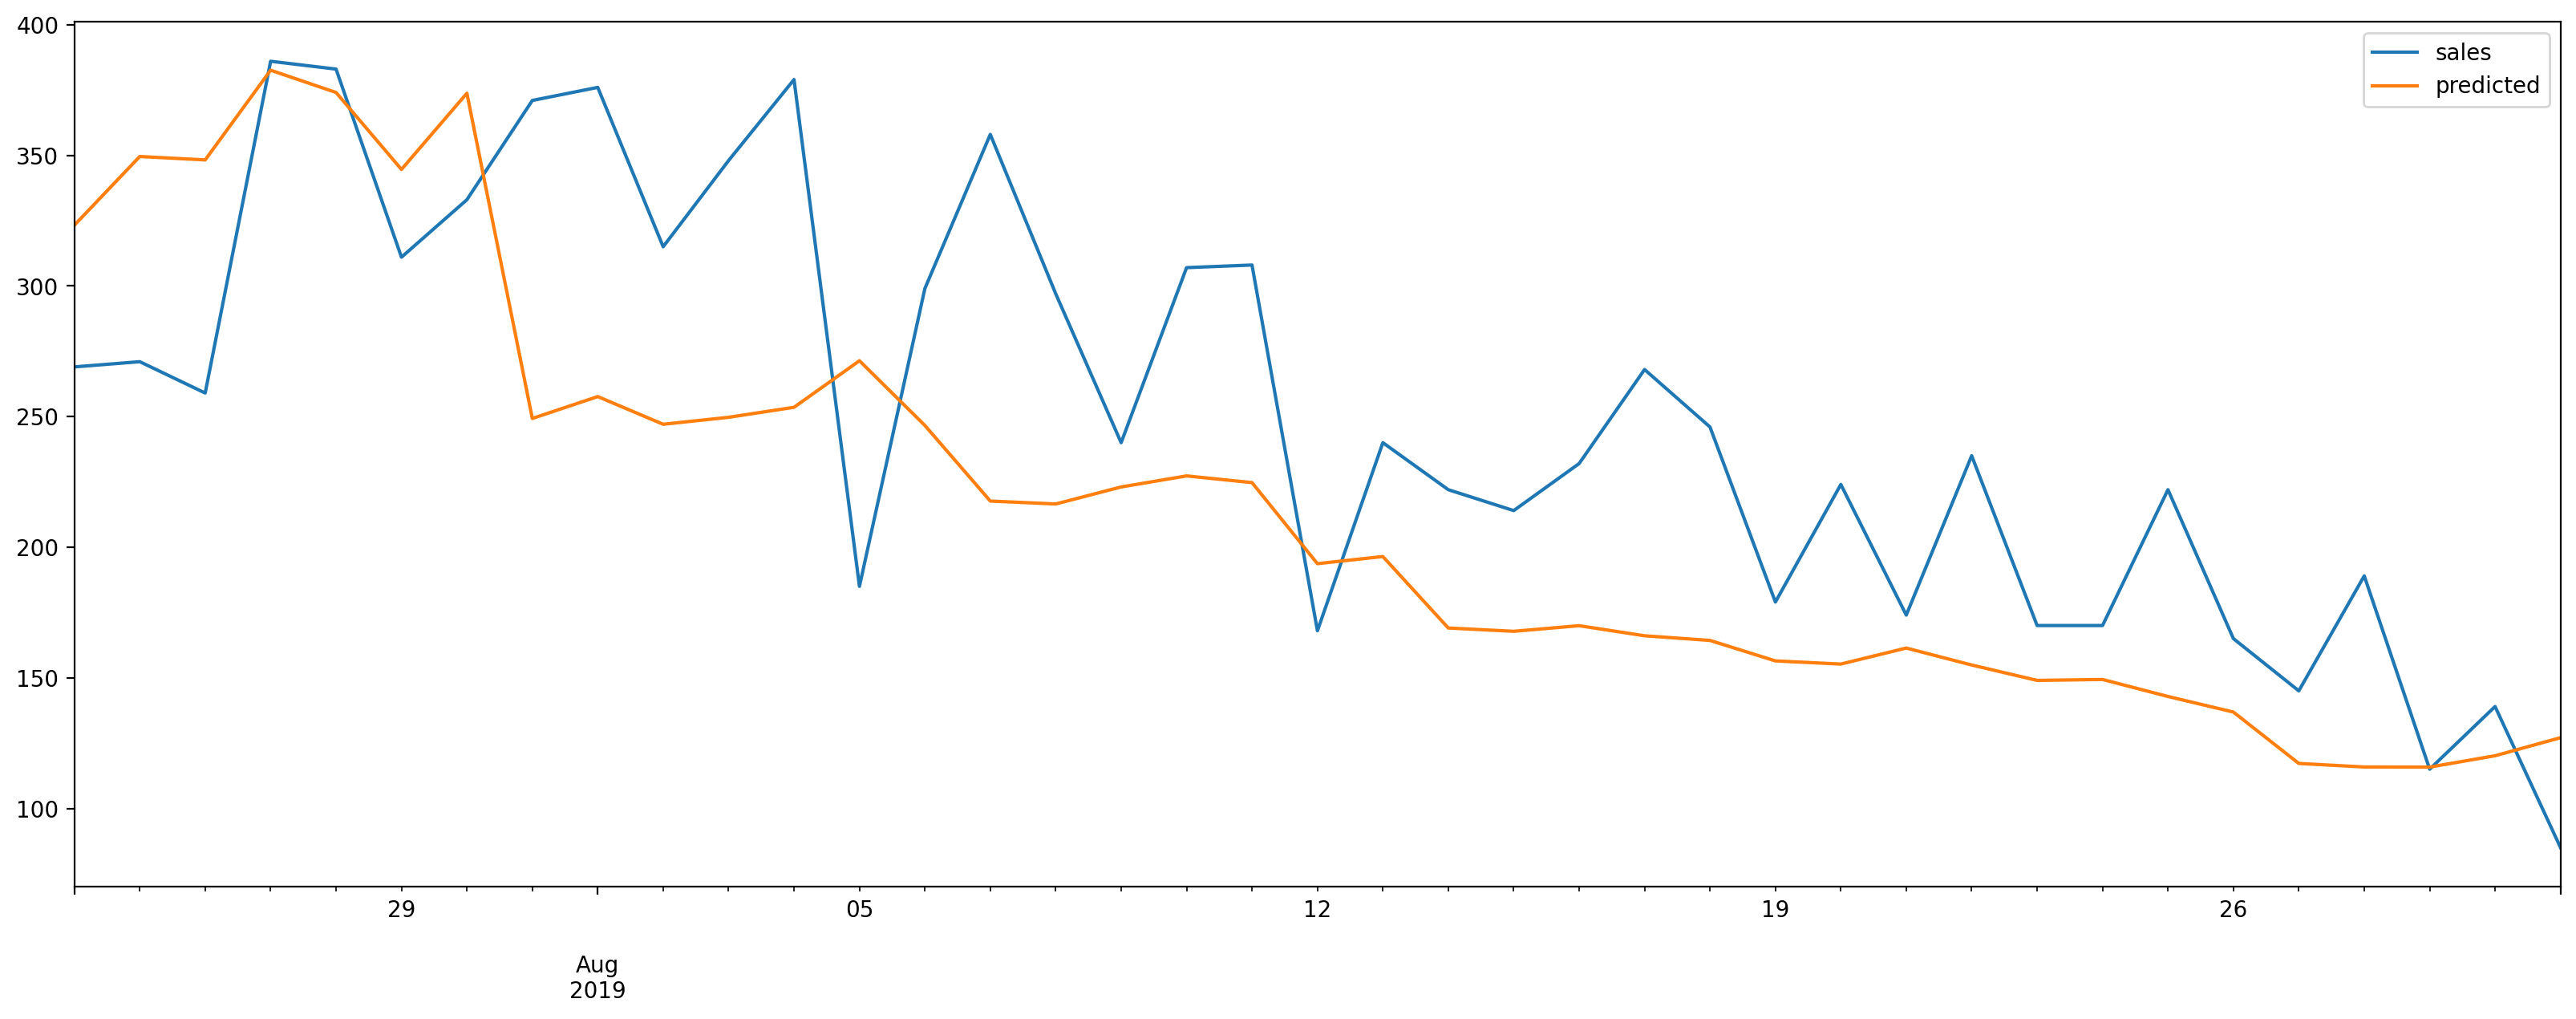

In [59]:
rf = RandomForestRegressor(random_state=0, n_estimators=200, max_features=4)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf["predicted"] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

## Review

What are the important points of analyzing Time series data?

1. Data check

2. Date Type(day, month, year)

3. Handling Null values

4. When using RNN(Recurrent Neural Networks), hyperparameters must be tuned well

If univariate data(단변량 데이터) does not reflect the characteristic of Time series, there are few things can be tried:

(1) Generating multivariate features based on a specific window size, and execute regression

(2) Based on the characteristic of the data, date or certain period may matter.

(3) Tuning Hyperparameter with effort.

### What is Univariate data?(단변량 데이터란?)
- A type of data which consists of observations on onlty a single characteristic or attribute.
- 각 단위에 대해 하나의 속성만 측정하여 얻게 되는 변수에 대한 자료